In [9]:
#Libraries imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [10]:
data = pd.read_csv('train.csv')

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.shape

(891, 12)

In [16]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
data.drop('PassengerId', axis =1, inplace = True)

In [40]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [42]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [43]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [44]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [82]:
grp = data.groupby(['Pclass', 'Survived']).Sex.value_counts()
grp

Pclass  Survived  Sex   
1       0         male       77
                  female      3
        1         female     91
                  male       45
2       0         male       91
                  female      6
        1         female     70
                  male       17
3       0         male      300
                  female     72
        1         female     72
                  male       47
Name: Sex, dtype: int64

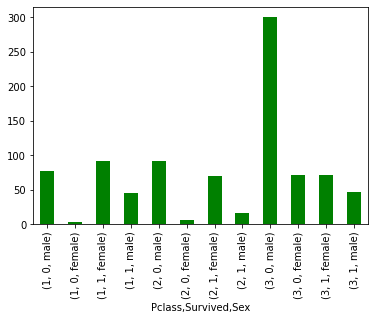

In [83]:
grp = data.groupby(['Pclass', 'Survived']).Sex.value_counts().plot(kind = 'bar', color = 'green',)


In [85]:
data.isnull().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [86]:
data['Age'].mean()

29.69911764705882

In [89]:
data['Age'].fillna(29.6, inplace = True)
data.isnull().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [95]:
data.drop('Cabin', inplace = True, axis = 1)
data.isnull().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Embarked     True
dtype: bool

In [99]:
data['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [103]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [104]:
data['Embarked'].fillna('S', inplace = True)

In [105]:
data.isnull().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Embarked    False
dtype: bool

Text(0, 0.5, 'Counts')

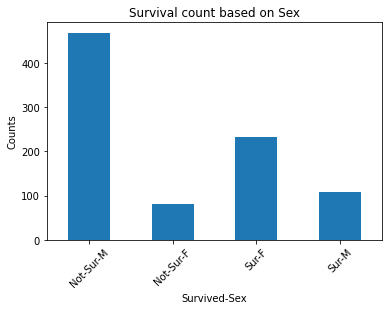

In [141]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
data.groupby('Survived').Sex.value_counts().plot(kind = 'bar', title = 'Survival count based on Sex')
plt.xlabel("Survived-Sex")
xticklabels = ['Not-Sur-M', 'Not-Sur-F', 'Sur-F', 'Sur-M']
ax.set_xticklabels(xticklabels, rotation = 45)
plt.ylabel('Counts')                                                 

Text(0, 0.5, 'Counts')

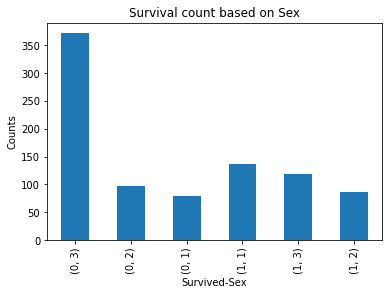

In [143]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
data.groupby('Survived').Pclass.value_counts().plot(kind = 'bar', title = 'Survival count based on Sex')
plt.xlabel("Survived-Sex")
#xticklabels = ['Not-Sur-M', 'Not-Sur-F', 'Sur-F', 'Sur-M']
#ax.set_xticklabels(xticklabels, rotation = 45)
plt.ylabel('Counts') 

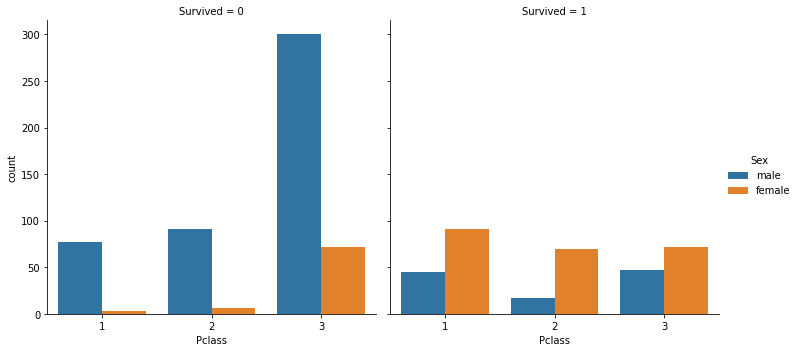

In [151]:
sns.catplot( x= 'Pclass', hue = 'Sex',col = 'Survived', data = data, kind = 'count')

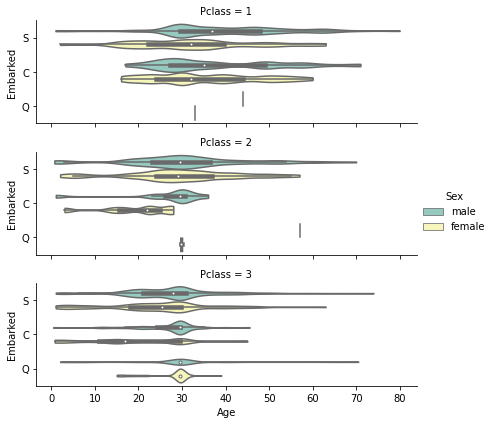

In [158]:
g = sns.catplot(x="Age", y="Embarked", hue="Sex", row="Pclass",data=data[data.Embarked.notnull()],orient="h", height=2, aspect=3, palette="Set3", kind="violin", dodge=True, cut=0, bw=.2)

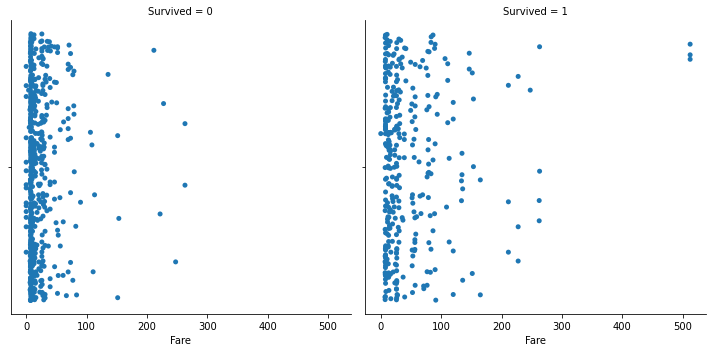

In [176]:
data.groupby('Survived').Fare.value_counts()
sns.catplot(x = 'Fare', col = 'Survived', data =data , kind = 'strip')

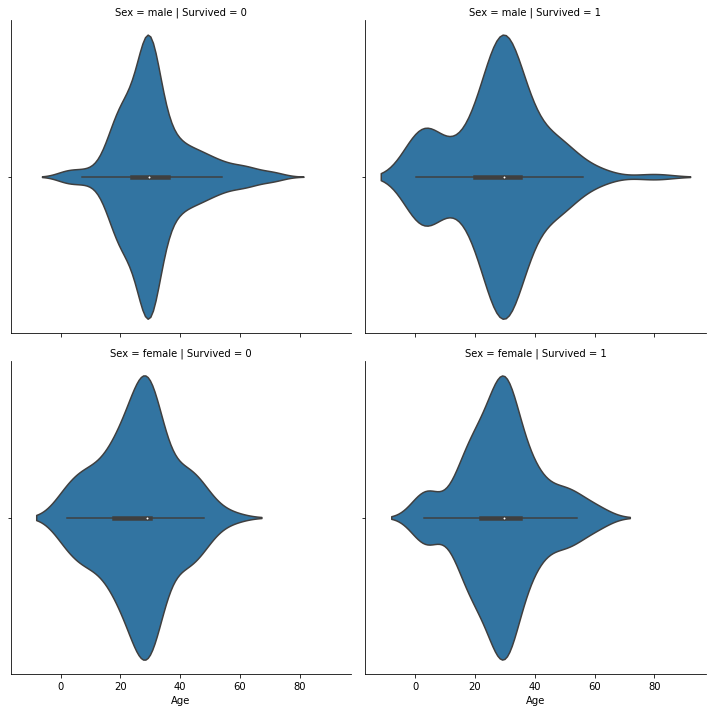

In [181]:
sns.catplot(x = 'Age', col = 'Survived', row = 'Sex', data =data , kind = 'violin')

In [189]:
data.groupby('Sex').Age.max()

Sex
female    63.0
male      80.0
Name: Age, dtype: float64

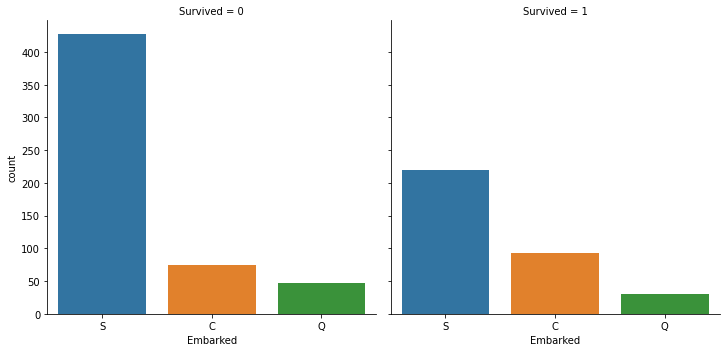

In [191]:
sns.catplot(x = 'Embarked', col = 'Survived', data =data , kind = 'count')

In [197]:
data.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

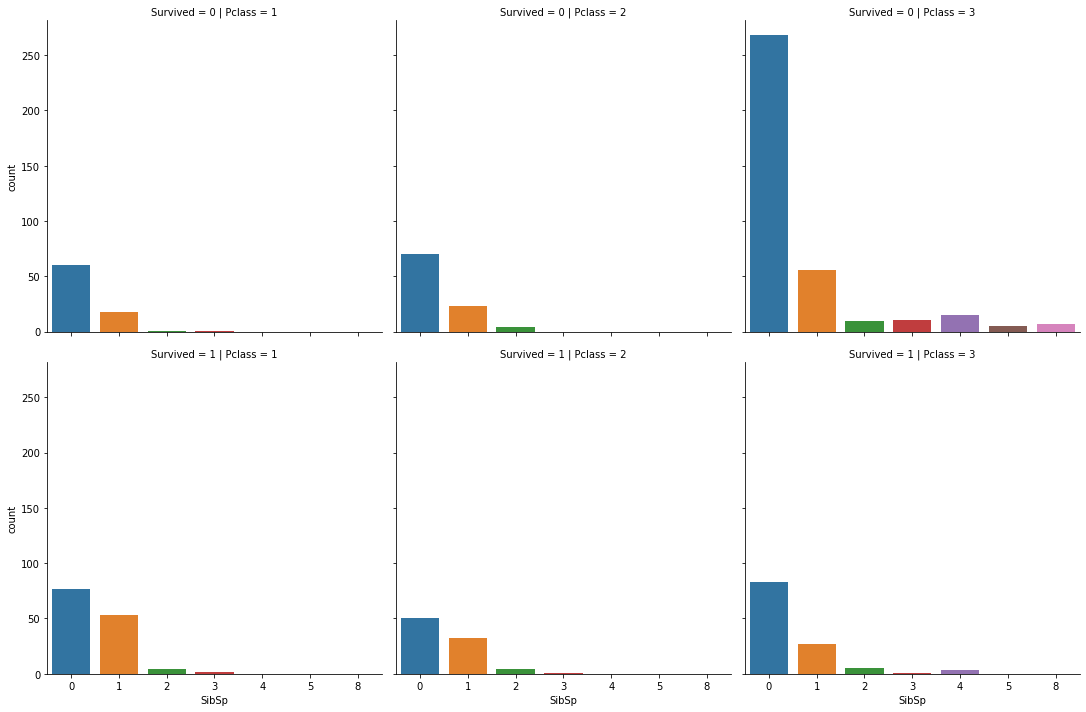

In [202]:
sns.catplot(x = 'SibSp', col = 'Pclass', row = 'Survived', data =data , kind = 'count')

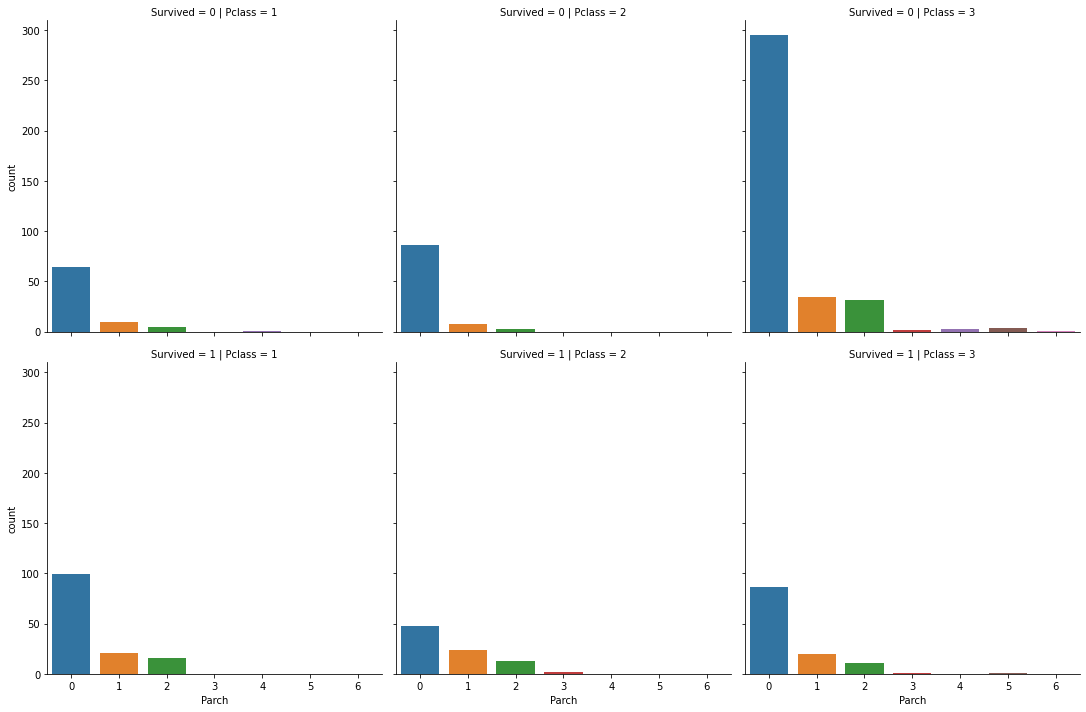

In [203]:
sns.catplot(x = 'Parch', col = 'Pclass', row = 'Survived', data =data , kind = 'count')

In [206]:
sex = pd.get_dummies(data['Sex'], drop_first = True)
embark = pd.get_dummies(data['Embarked'], drop_first = True)
data.drop(['Sex', 'Embarked','Name', 'Ticket'], axis = 1, inplace = True)
data = pd.concat([data, sex, embark], axis = 1)

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis = 1),data['Survived'], test_size = 0.30, random_state = 101)

In [210]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Ojaswi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [212]:
pred = model.predict(X_test)

In [217]:
from sklearn.metrics import classification_report, roc_curve, auc
result = classification_report(y_test, pred)
print(result)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       154
           1       0.79      0.65      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



In [218]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.759626338573707

In [222]:
test_data = pd.read_csv('test.csv')

In [223]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [232]:
#for test data
test_sex = pd.get_dummies(test_data['Sex'],drop_first=True)
test_embark = pd.get_dummies(test_data['Embarked'],drop_first=True)
test_data.drop(['Sex','Embarked','Name','Ticket', 'Cabin'],axis=1,inplace=True)
test_data = pd.concat([test_data,test_sex,test_embark],axis=1)
#fill null value of fare column with 0
test_data.Fare.fillna(0 ,inplace = True)
test_data.head()

KeyError: 'Sex'

In [245]:
#test_data.drop('Cabin', axis = 1, inplace = True)
test_data.head()
test_data['Age'].mean()
test_data['Age'].fillna(30, inplace = True)
test_data.isnull().any()

PassengerId    False
Pclass         False
Age            False
SibSp          False
Parch          False
Fare           False
male           False
Q              False
S              False
dtype: bool

In [250]:
id = test_data['PassengerId']
predictions = model.predict(test_data.drop('PassengerId', axis=1))
result = pd.DataFrame({ 'PassengerId' : id, 'Survived': predictions })
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [252]:
#writing the output in csv 
result.to_csv('titanic-predictions.csv', index = False)